In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
data = pd.read_csv("Probabilities Table.csv")
display(data)

,rat_cluster_name,rat_cluster_count,rat_total_appeareces
0,aladdin A1,10,49
1,aladdin A2,15,49
2,aladdin A3,24,49
3,aladdin B1,10,49
4,aladdin B2,24,49
...,...,...,...
1204,woody M4,2,6
1205,woody N1,3,6
1206,woody N3,3,6
1207,woody O2,4,6


In [3]:
def get_probabilities(row):
    return row.rat_cluster_count/row.rat_total_appeareces

In [4]:
data['Probability'] = data.apply(get_probabilities,axis=1)
display(data)

,rat_cluster_name,rat_cluster_count,rat_total_appeareces,Probability
0,aladdin A1,10,49,0.204082
1,aladdin A2,15,49,0.306122
2,aladdin A3,24,49,0.489796
3,aladdin B1,10,49,0.204082
4,aladdin B2,24,49,0.489796
...,...,...,...,...
1204,woody M4,2,6,0.333333
1205,woody N1,3,6,0.500000
1206,woody N3,3,6,0.500000
1207,woody O2,4,6,0.666667


In [5]:
def get_name(row):
    #print(row.rat_cluster_name.split())
    return row.rat_cluster_name.split()[0]

In [6]:
data['rat_name'] = data.apply(get_name,axis=1)
display(data)

,rat_cluster_name,rat_cluster_count,rat_total_appeareces,Probability,rat_name
0,aladdin A1,10,49,0.204082,aladdin
1,aladdin A2,15,49,0.306122,aladdin
2,aladdin A3,24,49,0.489796,aladdin
3,aladdin B1,10,49,0.204082,aladdin
4,aladdin B2,24,49,0.489796,aladdin
...,...,...,...,...,...
1204,woody M4,2,6,0.333333,woody
1205,woody N1,3,6,0.500000,woody
1206,woody N3,3,6,0.500000,woody
1207,woody O2,4,6,0.666667,woody


In [7]:
def get_cluster(row):
    #print(row.rat_cluster_name.split())
    return row.rat_cluster_name.split()[1]

In [8]:
data['cluster_name'] = data.apply(get_cluster,axis=1)
display(data)

,rat_cluster_name,rat_cluster_count,rat_total_appeareces,Probability,rat_name,cluster_name
0,aladdin A1,10,49,0.204082,aladdin,A1
1,aladdin A2,15,49,0.306122,aladdin,A2
2,aladdin A3,24,49,0.489796,aladdin,A3
3,aladdin B1,10,49,0.204082,aladdin,B1
4,aladdin B2,24,49,0.489796,aladdin,B2
...,...,...,...,...,...,...
1204,woody M4,2,6,0.333333,woody,M4
1205,woody N1,3,6,0.500000,woody,N1
1206,woody N3,3,6,0.500000,woody,N3
1207,woody O2,4,6,0.666667,woody,O2


In [9]:
del data["rat_cluster_name"]


In [10]:
display(data)
listOfRats = data["rat_name"].values.tolist()
ratDict = {}
for rat in listOfRats:
    try:
        ratDict[rat] = ratDict[rat] +1
    except:
        ratDict[rat] = 1
ratList = list(ratDict.keys())
print(ratList)

,rat_cluster_count,rat_total_appeareces,Probability,rat_name,cluster_name
0,10,49,0.204082,aladdin,A1
1,15,49,0.306122,aladdin,A2
2,24,49,0.489796,aladdin,A3
3,10,49,0.204082,aladdin,B1
4,24,49,0.489796,aladdin,B2
...,...,...,...,...,...
1204,2,6,0.333333,woody,M4
1205,3,6,0.500000,woody,N1
1206,3,6,0.500000,woody,N3
1207,4,6,0.666667,woody,O2


['aladdin', 'alexis', 'andrea', 'barbie', 'bopeep', 'buttercup', 'buzz', 'captain', 'carl', 'fiona', 'harley', 'jafar', 'jimi', 'johnny', 'jr', 'juana', 'ken', 'kobe', 'kryssia', 'mike', 'monster', 'neftali', 'pepper', 'raissa', 'raven', 'renata', 'rex', 'sarah', 'scar', 'shakira', 'simba', 'slinky', 'sully', 'trixie', 'vision', 'wanda', 'woody']


In [11]:
ratProbabilitiesDict = {}
ratClustersDict = {}

In [12]:
grouped_obj = data.groupby("rat_name")
separator_string= "\n"+"-"*50+"\n"

In [13]:
for rat_name, filtered_df in grouped_obj:
    #print(rat_name,end=separator_string)
    ratClustersDict[rat_name] = filtered_df["cluster_name"].values.tolist()
    ratProbabilitiesDict[rat_name] = filtered_df['Probability'].values.tolist()
    #print(filtered_df[["cluster_name","Probability"]].head(3),end=separator_string)

In [14]:
allClustersList = ["A1","A2","A3",
"D1","D2","D3",
"G1","G2","G3","G4",
"J1","J2","J3","J4",
"M1","M2","M3","M4"]
print(ratList)

['aladdin', 'alexis', 'andrea', 'barbie', 'bopeep', 'buttercup', 'buzz', 'captain', 'carl', 'fiona', 'harley', 'jafar', 'jimi', 'johnny', 'jr', 'juana', 'ken', 'kobe', 'kryssia', 'mike', 'monster', 'neftali', 'pepper', 'raissa', 'raven', 'renata', 'rex', 'sarah', 'scar', 'shakira', 'simba', 'slinky', 'sully', 'trixie', 'vision', 'wanda', 'woody']


In [15]:
#check to see if the tempClusters[j] == allClustersList[k]
#yes defaultProbabilites[k] = tempClusters[j]
#no then advance the loop
allRatProbabilities = []
allRatClusters = []
for i in ratList:
    tempClusters = ratClustersDict[i]
    tempProbabilities = ratProbabilitiesDict[i]
    defaultProbabilities = np.zeros(len(allClustersList))
    tempDict = {"A1":0,"A2":0,"A3":0,
        "D1":0,"D2":0,"D3":0,
        "G1":0,"G2":0,"G3":0,"G4":0,
        "J1":0,"J2":0,"J3":0,"J4":0,
        "M1":0,"M2":0,"M3":0,"M4":0}
    for j,value in enumerate(tempClusters):
        if value in list(tempDict.keys()):
            tempDict[value] = tempProbabilities[j]
    allRatProbabilities.append(list(tempDict.values()))
    allRatClusters.append(list(tempDict.keys()))

#for i in range(len(allRatProbabilities)):
#    print(ratList[i])
#    for j in range(len(allRatProbabilities[i])):
#        print(allRatClusters[i][j],":",allRatProbabilities[i][j])
        


In [16]:
display(allRatProbabilities)

[[0.20408163265306123,
  0.30612244897959184,
  0.4897959183673469,
  0.2903225806451613,
  0.5161290322580645,
  0.1935483870967742,
  0.7352941176470589,
  0.08823529411764706,
  0,
  0.17647058823529413,
  0.3409090909090909,
  0.11363636363636363,
  0.18181818181818182,
  0.36363636363636365,
  0.1111111111111111,
  0.3333333333333333,
  0.08888888888888889,
  0.4666666666666667],
 [0.075,
  0.275,
  0.65,
  0.13043478260869565,
  0.5217391304347826,
  0.34782608695652173,
  0.7272727272727273,
  0.12121212121212122,
  0.06060606060606061,
  0.09090909090909091,
  0.4594594594594595,
  0.13513513513513514,
  0.08108108108108109,
  0.32432432432432434,
  0.044444444444444446,
  0.5111111111111111,
  0.044444444444444446,
  0.4],
 [0.05128205128205128,
  0.3333333333333333,
  0.6153846153846154,
  0.11538461538461539,
  0.8461538461538461,
  0.038461538461538464,
  0.92,
  0.04,
  0,
  0.04,
  0.5428571428571428,
  0.08571428571428572,
  0.02857142857142857,
  0.34285714285714286,
  

In [17]:
allRatProbabilitiesArray = np.array(allRatProbabilities)
display(allRatProbabilitiesArray)

array([[0.20408163, 0.30612245, 0.48979592, 0.29032258, 0.51612903,
        0.19354839, 0.73529412, 0.08823529, 0.        , 0.17647059,
        0.34090909, 0.11363636, 0.18181818, 0.36363636, 0.11111111,
        0.33333333, 0.08888889, 0.46666667],
       [0.075     , 0.275     , 0.65      , 0.13043478, 0.52173913,
        0.34782609, 0.72727273, 0.12121212, 0.06060606, 0.09090909,
        0.45945946, 0.13513514, 0.08108108, 0.32432432, 0.04444444,
        0.51111111, 0.04444444, 0.4       ],
       [0.05128205, 0.33333333, 0.61538462, 0.11538462, 0.84615385,
        0.03846154, 0.92      , 0.04      , 0.        , 0.04      ,
        0.54285714, 0.08571429, 0.02857143, 0.34285714, 0.08695652,
        0.36956522, 0.19565217, 0.34782609],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.83333333, 0.16666667, 0.        ],
    

In [18]:
allDistances = []
for i, slice in enumerate(allRatProbabilitiesArray):
    distances = euclidean_distances([slice],allRatProbabilitiesArray)
    allDistances.append(distances)
    distances2Names = dict(zip(distances[0],ratList))
    sortedValues = sorted(distances2Names.keys())
    nearest_neighbors = sortedValues[:4]
    #print(distances2Names[distances[0][0]])
    print(ratList[i]+"'s 4 Nearest Neighbors are: \t\t\t ","1.)",distances2Names[nearest_neighbors[0]],
          "2.)",distances2Names[nearest_neighbors[1]],
          "3.)",distances2Names[nearest_neighbors[2]],
          "4.)",distances2Names[nearest_neighbors[3]],"\n")

aladdin's 4 Nearest Neighbors are: 			  1.) aladdin 2.) jafar 3.) sarah 4.) shakira 

alexis's 4 Nearest Neighbors are: 			  1.) alexis 2.) jafar 3.) sarah 4.) carl 

andrea's 4 Nearest Neighbors are: 			  1.) andrea 2.) harley 3.) neftali 4.) jimi 

barbie's 4 Nearest Neighbors are: 			  1.) barbie 2.) vision 3.) slinky 4.) woody 

bopeep's 4 Nearest Neighbors are: 			  1.) monster 2.) barbie 3.) vision 4.) slinky 

buttercup's 4 Nearest Neighbors are: 			  1.) buttercup 2.) ken 3.) pepper 4.) buzz 

buzz's 4 Nearest Neighbors are: 			  1.) buzz 2.) woody 3.) trixie 4.) buttercup 

captain's 4 Nearest Neighbors are: 			  1.) captain 2.) trixie 3.) buttercup 4.) buzz 

carl's 4 Nearest Neighbors are: 			  1.) carl 2.) jimi 3.) kryssia 4.) alexis 

fiona's 4 Nearest Neighbors are: 			  1.) fiona 2.) neftali 3.) raissa 4.) sully 

harley's 4 Nearest Neighbors are: 			  1.) harley 2.) andrea 3.) neftali 4.) jimi 

jafar's 4 Nearest Neighbors are: 			  1.) jafar 2.) alexis 3.) aladdin 4.) 

In [19]:
from matplotlib import pyplot as plt
import numpy as np

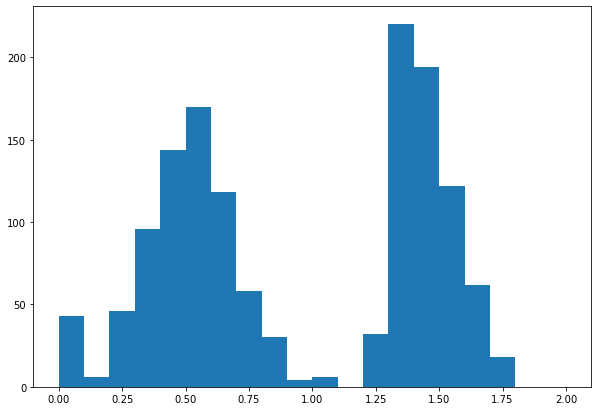

In [20]:
oneDimensionalDistances = np.array(allDistances)
oneDimensionalDistances = oneDimensionalDistances.flatten()

fig, ax = plt.subplots(figsize = (10,7))
ax.hist(oneDimensionalDistances,bins = [0,0.1,0.2,.3,0.4,.5,0.6,.7,0.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
plt.show()


In [21]:
allDistances = []
for i, slice in enumerate(allRatProbabilitiesArray):
    distances = euclidean_distances([slice],allRatProbabilitiesArray)
    allDistances.append(distances)
    distances2Names = dict(zip(distances[0],ratList))
    sortedValues = sorted(distances2Names.keys())
    nearest_neighbors = sortedValues[:4]
    #print(distances2Names[distances[0][0]])
    print(ratList[i]+"'s Furthest Neighbors are: \t\t\t ",
          distances2Names[sortedValues[-14]],
          distances2Names[sortedValues[-15]],
          distances2Names[sortedValues[-16]],
          distances2Names[sortedValues[-17]],
          "\n")


aladdin's Furthest Neighbors are: 			  fiona simba neftali andrea 

alexis's Furthest Neighbors are: 			  fiona simba juana neftali 

andrea's Furthest Neighbors are: 			  juana mike kobe kryssia 

barbie's Furthest Neighbors are: 			  aladdin kryssia alexis simba 

bopeep's Furthest Neighbors are: 			  aladdin scar jafar kryssia 

buttercup's Furthest Neighbors are: 			  johnny raven carl jafar 

buzz's Furthest Neighbors are: 			  alexis sully jafar carl 

captain's Furthest Neighbors are: 			  jimi alexis jafar carl 

carl's Furthest Neighbors are: 			  fiona juana neftali jr 

fiona's Furthest Neighbors are: 			  carl kryssia alexis mike 

harley's Furthest Neighbors are: 			  juana mike kobe fiona 

jafar's Furthest Neighbors are: 			  fiona simba neftali juana 

jimi's Furthest Neighbors are: 			  juana fiona mike sarah 

johnny's Furthest Neighbors are: 			  fiona neftali juana jr 

jr's Furthest Neighbors are: 			  kryssia renata simba raven 

juana's Furthest Neighbors are: 		

In [22]:
print(ratList)

['aladdin', 'alexis', 'andrea', 'barbie', 'bopeep', 'buttercup', 'buzz', 'captain', 'carl', 'fiona', 'harley', 'jafar', 'jimi', 'johnny', 'jr', 'juana', 'ken', 'kobe', 'kryssia', 'mike', 'monster', 'neftali', 'pepper', 'raissa', 'raven', 'renata', 'rex', 'sarah', 'scar', 'shakira', 'simba', 'slinky', 'sully', 'trixie', 'vision', 'wanda', 'woody']


In [23]:
oldRatList = ['aladdin', 'alexis', 'andrea', #3
 'carl', 'fiona', 'harley',#6
 'jafar', 'jimi', 'johnny',#9
 'jr', 'juana', 'kobe',#12
 'kryssia', 'mike','neftali',#15
 'raissa', 'raven', 'renata',#18
 'sarah', 'scar', 'shakira', #21
 'simba', 'sully']#23


In [24]:
allOldRatProbabilities = []
allOldRatClusters = []
for i in oldRatList:
    tempClusters = ratClustersDict[i]
    tempProbabilities = ratProbabilitiesDict[i]
    defaultProbabilities = np.zeros(len(allClustersList))
    tempDict = {"A1":0,"A2":0,"A3":0,
        "D1":0,"D2":0,"D3":0,
        "G1":0,"G2":0,"G3":0,"G4":0,
        "J1":0,"J2":0,"J3":0,"J4":0,
        "M1":0,"M2":0,"M3":0,"M4":0}
    for j,value in enumerate(tempClusters):
        if value in list(tempDict.keys()):
            tempDict[value] = tempProbabilities[j]
    allOldRatProbabilities.append(list(tempDict.values()))
    allOldRatClusters.append(list(tempDict.keys()))

In [25]:
display(np.array(allOldRatProbabilities).shape)
display(np.zeros(18))

(23, 18)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [26]:
allOldRatDistances = []
allOldRatProbabilitiesArray = np.array(allOldRatProbabilities)
for i, slice in enumerate(allOldRatProbabilitiesArray):
    distances = euclidean_distances([slice],allOldRatProbabilitiesArray)
    allOldRatDistances.append(distances)
    distances2Names = dict(zip(distances[0],oldRatList))
    sortedValues = sorted(distances2Names.keys())
    furthest_neighbors = sortedValues[-4:]
    #print(distances2Names[distances[0][0]])
    print(oldRatList[i]+"'s FNs: \t ","1.)",
          distances2Names[furthest_neighbors[0]],
          "2.)",distances2Names[furthest_neighbors[1]],
          "3.)",distances2Names[furthest_neighbors[2]],
          "4.)",distances2Names[furthest_neighbors[3]],"\n")

aladdin's FNs: 	  1.) andrea 2.) neftali 3.) simba 4.) fiona 

alexis's FNs: 	  1.) neftali 2.) juana 3.) simba 4.) fiona 

andrea's FNs: 	  1.) kryssia 2.) kobe 3.) mike 4.) juana 

carl's FNs: 	  1.) jr 2.) neftali 3.) juana 4.) fiona 

fiona's FNs: 	  1.) mike 2.) alexis 3.) kryssia 4.) carl 

harley's FNs: 	  1.) fiona 2.) kobe 3.) mike 4.) juana 

jafar's FNs: 	  1.) juana 2.) neftali 3.) simba 4.) fiona 

jimi's FNs: 	  1.) sarah 2.) mike 3.) fiona 4.) juana 

johnny's FNs: 	  1.) jr 2.) juana 3.) neftali 4.) fiona 

jr's FNs: 	  1.) raven 2.) simba 3.) renata 4.) kryssia 

juana's FNs: 	  1.) kryssia 2.) andrea 3.) carl 4.) simba 

kobe's FNs: 	  1.) alexis 2.) fiona 3.) neftali 4.) andrea 

kryssia's FNs: 	  1.) mike 2.) juana 3.) jr 4.) fiona 

mike's FNs: 	  1.) andrea 2.) fiona 3.) raven 4.) neftali 

neftali's FNs: 	  1.) kryssia 2.) kobe 3.) carl 4.) mike 

raissa's FNs: 	  1.) andrea 2.) carl 3.) jr 4.) mike 

raven's FNs: 	  1.) juana 2.) jr 3.) fiona 4.) mike 

renata's

In [27]:
allOldRatDistances = []
allOldRatProbabilitiesArray = np.array(allOldRatProbabilities)
for i, slice in enumerate(allOldRatProbabilitiesArray):
    distances = euclidean_distances([slice],allOldRatProbabilitiesArray)
    allOldRatDistances.append(distances)
    distances2Names = dict(zip(distances[0],oldRatList))
    sortedValues = sorted(distances2Names.keys())
    nearest_neighbors = sortedValues[:4]
    #print(distances2Names[distances[0][0]])
    print(oldRatList[i]+"'s NNs: \t ","1.)",
          distances2Names[nearest_neighbors[0]],
          "2.)",distances2Names[nearest_neighbors[1]],
          "3.)",distances2Names[nearest_neighbors[2]],
          "4.)",distances2Names[nearest_neighbors[3]],"\n")

aladdin's NNs: 	  1.) aladdin 2.) jafar 3.) sarah 4.) shakira 

alexis's NNs: 	  1.) alexis 2.) jafar 3.) sarah 4.) carl 

andrea's NNs: 	  1.) andrea 2.) harley 3.) neftali 4.) jimi 

carl's NNs: 	  1.) carl 2.) jimi 3.) kryssia 4.) alexis 

fiona's NNs: 	  1.) fiona 2.) neftali 3.) raissa 4.) sully 

harley's NNs: 	  1.) harley 2.) andrea 3.) neftali 4.) jimi 

jafar's NNs: 	  1.) jafar 2.) alexis 3.) aladdin 4.) johnny 

jimi's NNs: 	  1.) jimi 2.) scar 3.) sully 4.) shakira 

johnny's NNs: 	  1.) johnny 2.) shakira 3.) kryssia 4.) jafar 

jr's NNs: 	  1.) jr 2.) jafar 3.) jimi 4.) aladdin 

juana's NNs: 	  1.) juana 2.) raissa 3.) sarah 4.) shakira 

kobe's NNs: 	  1.) kobe 2.) scar 3.) shakira 4.) sully 

kryssia's NNs: 	  1.) kryssia 2.) johnny 3.) shakira 4.) carl 

mike's NNs: 	  1.) mike 2.) sully 3.) jafar 4.) aladdin 

neftali's NNs: 	  1.) neftali 2.) andrea 3.) harley 4.) fiona 

raissa's NNs: 	  1.) raissa 2.) shakira 3.) scar 4.) raven 

raven's NNs: 	  1.) raven 2.) rai

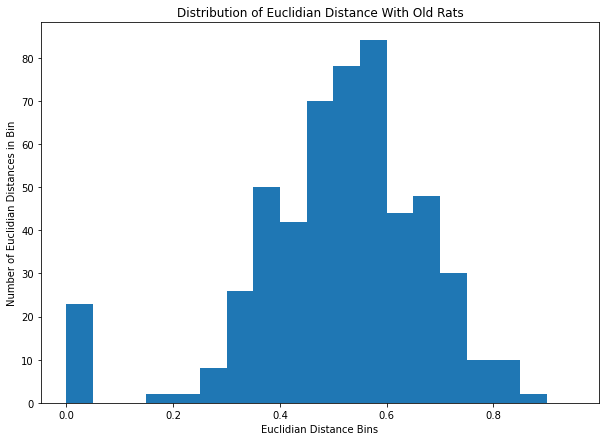

[2.10734243e-08 4.16554694e-01 5.92786699e-01 ... 4.37444882e-01
 6.23609564e-01 0.00000000e+00]


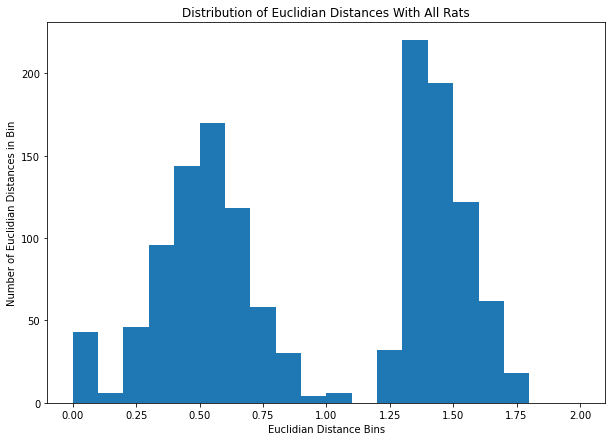

In [32]:
oneDimensionalOldRatDistances = np.array(allOldRatDistances)
oneDimensionalOldRatDistances = oneDimensionalOldRatDistances.flatten()

fig, ax = plt.subplots(figsize = (10,7))
ax.hist(oneDimensionalOldRatDistances,bins = np.arange(0,1,0.05))
plt.xlabel("Euclidian Distance Bins")
plt.ylabel("Number of Euclidian Distances in Bin")
plt.title("Distribution of Euclidian Distance With Old Rats")
plt.savefig('Histogram of Old Rat Euclidian Distances.pdf')
plt.show()
  

oneDimensionalDistances = np.array(allDistances)
#print(oneDimensionalDistances)
oneDimensionalDistances = oneDimensionalDistances.flatten()
print(oneDimensionalDistances)

fig, ax = plt.subplots(figsize = (10,7))
ax.hist(oneDimensionalDistances,bins = [0,0.1,0.2,.3,0.4,.5,0.6,.7,0.8,.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
plt.xlabel("Euclidian Distance Bins")
plt.ylabel("Number of Euclidian Distances in Bin")
plt.title("Distribution of Euclidian Distances With All Rats")
plt.savefig('Histogram of All Rat Euclidian Distances.pdf')  
plt.show()
